In [1]:
#https://www.cdc.gov/mmwr/volumes/66/wr/mm6643a3.htm
#https://www.cdc.gov/nchs/data/hus/2017/066.pdf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('children_vaccination.csv')
df.head()

,Year,All,White,Black/ Africam American,American Indian/ Alaska Native,Asian,Native Hawaiian / Pacific Islander,2 or more races,Hispanic/ Latino,Bellow poverty,At or above poverty,Central city,Remaining Area,Outside MSA,Vaccine
0,2009,44.3,45.2,39.6,*,38.6,*,40.7,45.9,41.3,45.7,44.8,44.6,42.4,Combined 7-vaccine series
1,2010,56.6,56.9,54.5,64.1,59.3,*,61.3,55.5,52.8,58.7,56.5,57.2,55.2,Combined 7-vaccine series
2,2012,68.4,69.3,64.8,*,71.6,*,71.5,67.8,63.4,71.6,67.6,69.4,68.0,Combined 7-vaccine series
3,2013,70.4,72.1,65,70.1,72.7,*,71.8,69.3,64.4,73.8,68.8,72.5,69.1,Combined 7-vaccine series
4,2014,71.6,72.6,65.4,*,69.5,*,68.5,74.3,65.7,75.4,70.8,72.7,71.2,Combined 7-vaccine series


In [32]:
df['Vaccine'].unique()

array(['Combined 7-vaccine series', 'DTP/DT/DTaP (4 doses or more)',
       'Polio (3 doses or more)', 'Measles, mumps, rubella',
       'Hib (full series)', 'Hepatitis A (2 doses or more)',
       'Hepatitis B (3 doses or more)', 'Varicella',
       'PCV (4 doses or more)', 'Rotavirus vaccine'], dtype=object)

In [65]:
def get_tens(value):
    tens = 100
    value = int(value/10)*10
    if value < tens:
        tens = value
    return tens

In [289]:
# Combined 7-vaccine series
combined = ['DTP/DT/DTaP (4 doses or more)','Polio (3 doses or more)','Measles, mumps, rubella',
            'Hib (full series)', 'Hepatitis B (3 doses or more)', 'Varicella', 'PCV (4 doses or more)']

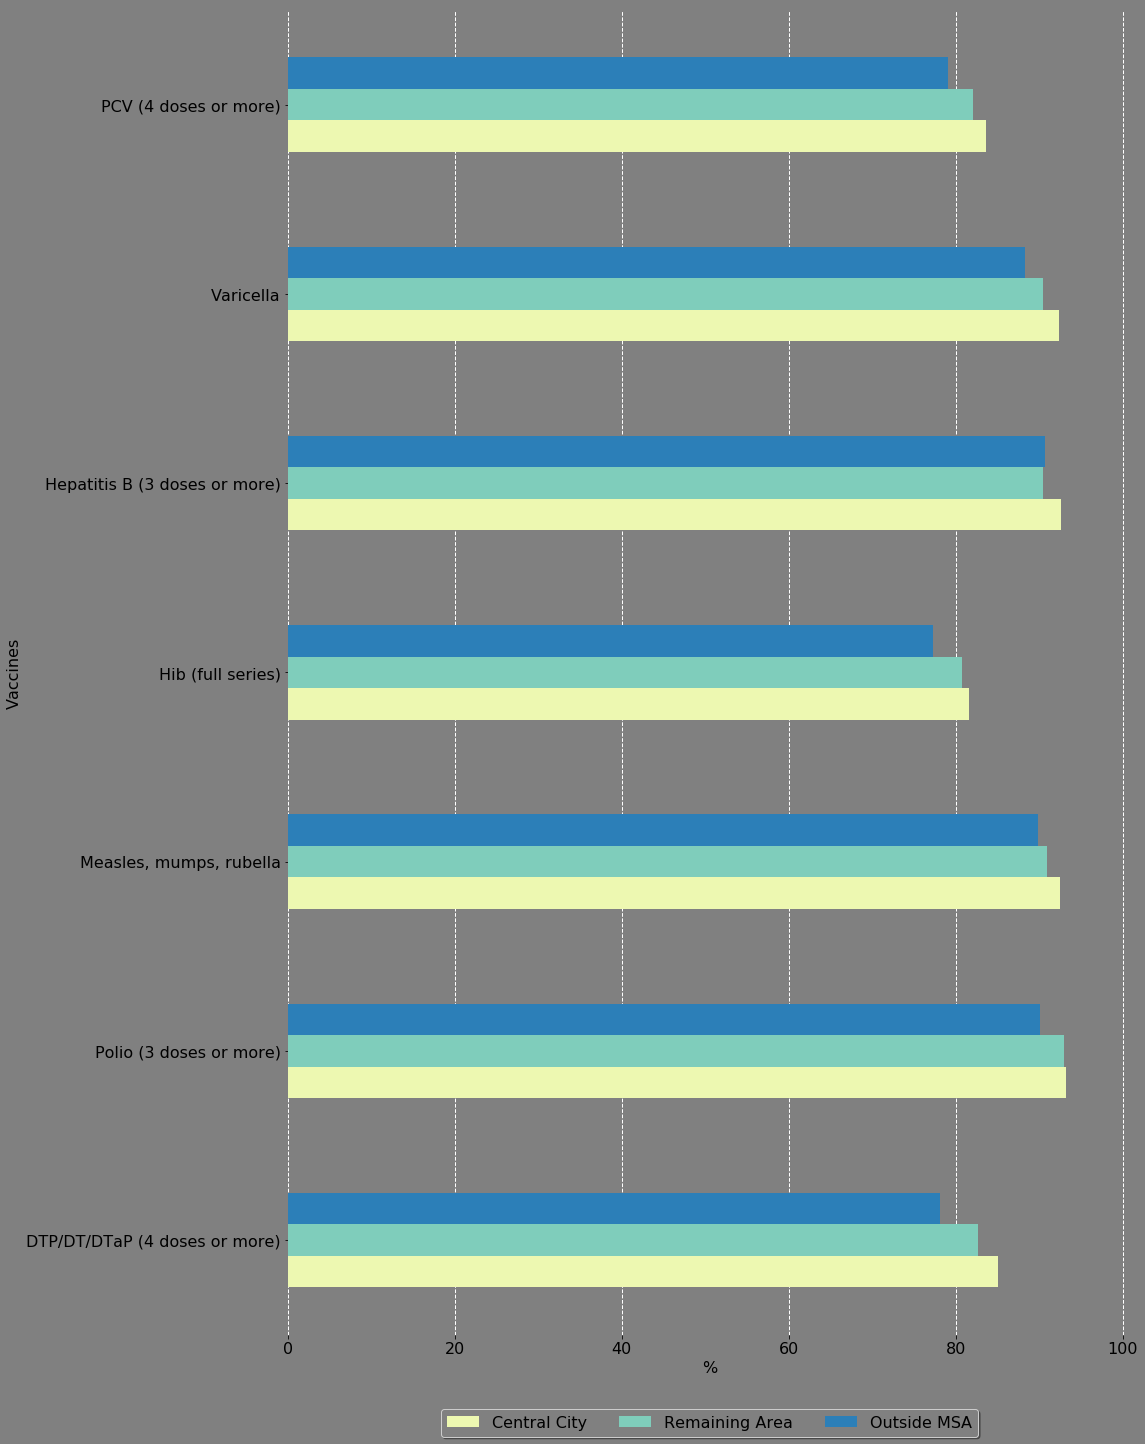

In [328]:
df_c = df[df['Year']==2017].copy()
df_c = df_c[df_c['Vaccine'].isin(combined)][['Central city', 'Remaining Area', 'Outside MSA','Vaccine']]

fig, ax = plt.subplots(1,figsize=(16,20))
fig.patch.set_facecolor('grey')
ax.set_facecolor('grey')  

df_c.plot(kind='barh', x='Vaccine', ax=ax, xlim=[0,101], color=["#edf8b1","#7fcdbb","#2c7fb8"], fontsize=16)
ax.legend(['Central City', 'Remaining Area', 'Outside MSA'],loc='upper center', bbox_to_anchor=(0.5, -0.05), 
            fancybox=True, shadow=True, ncol=5, facecolor='grey', fontsize=16)
ax.set_ylabel('Vaccines', fontsize=16)
ax.set_xlabel('%', fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.grid(color='white', linestyle='dashed', linewidth=1, axis = 'x')
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('combined.png', facecolor=fig.get_facecolor(), edgecolor='none')

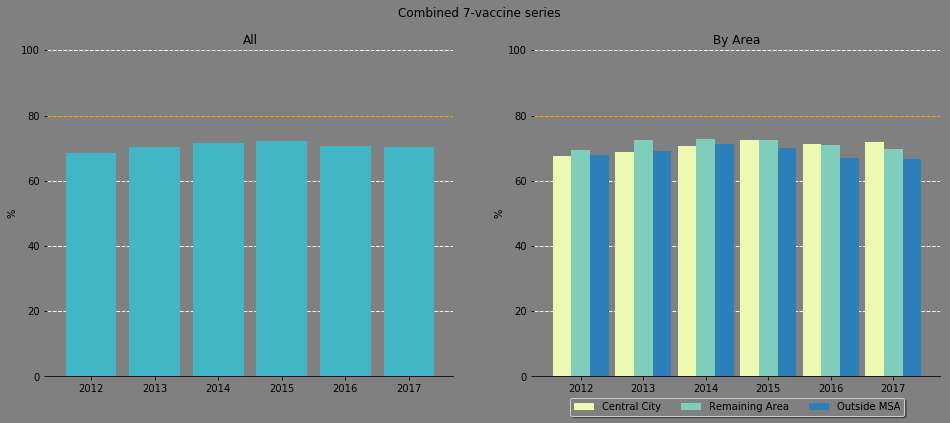

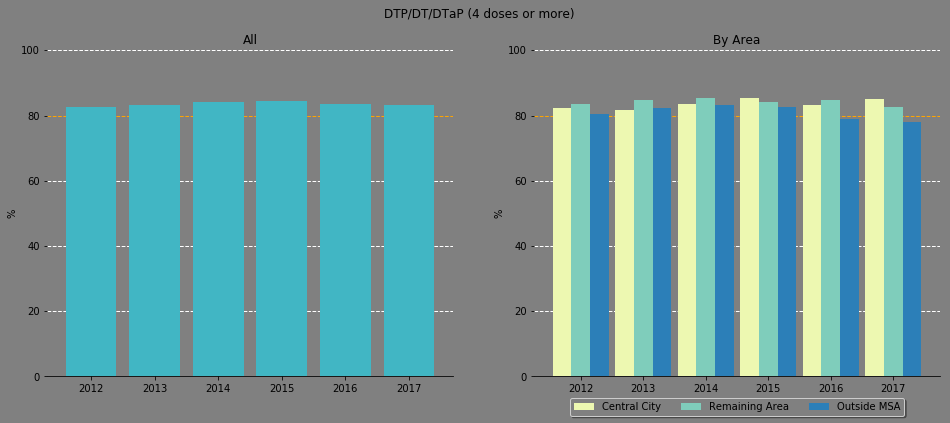

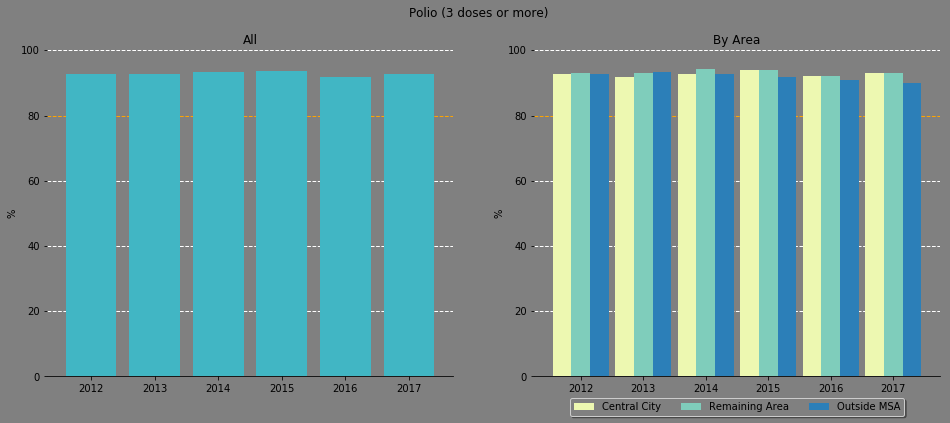

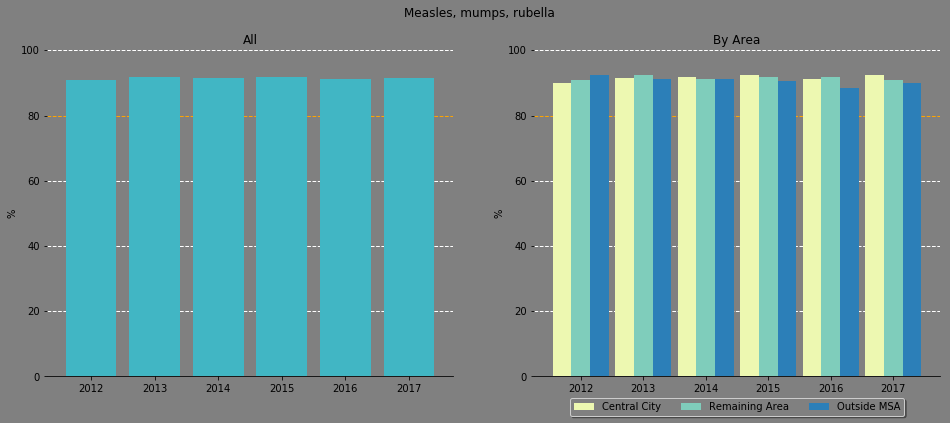

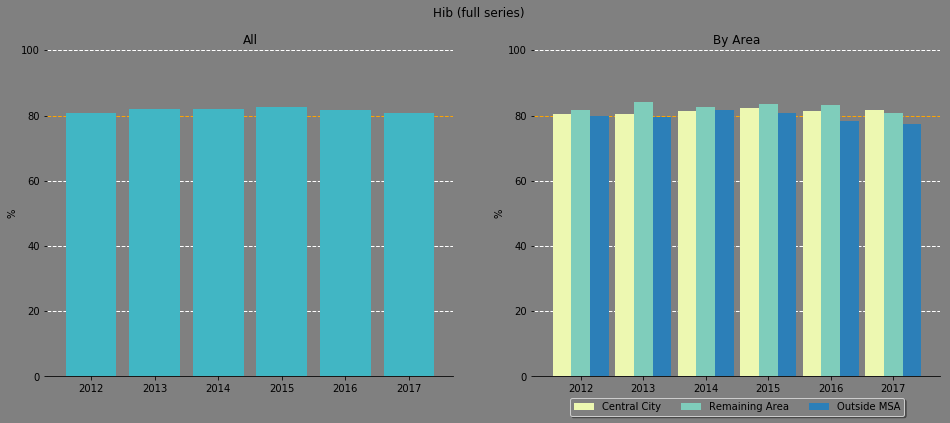

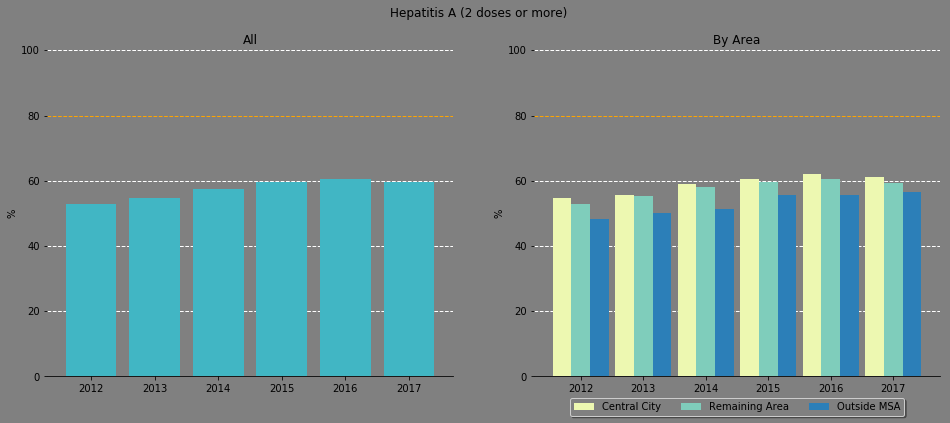

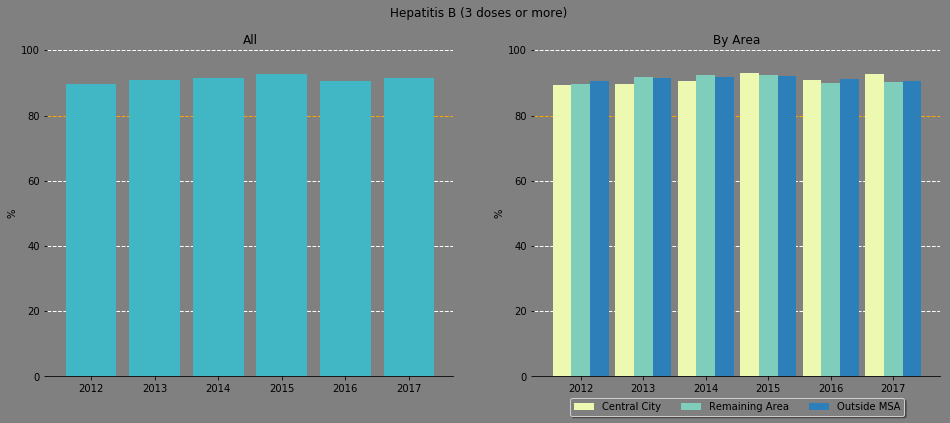

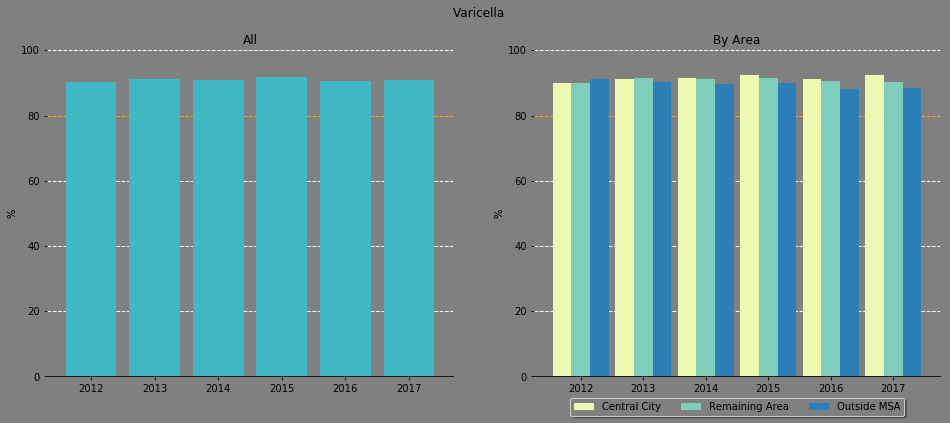

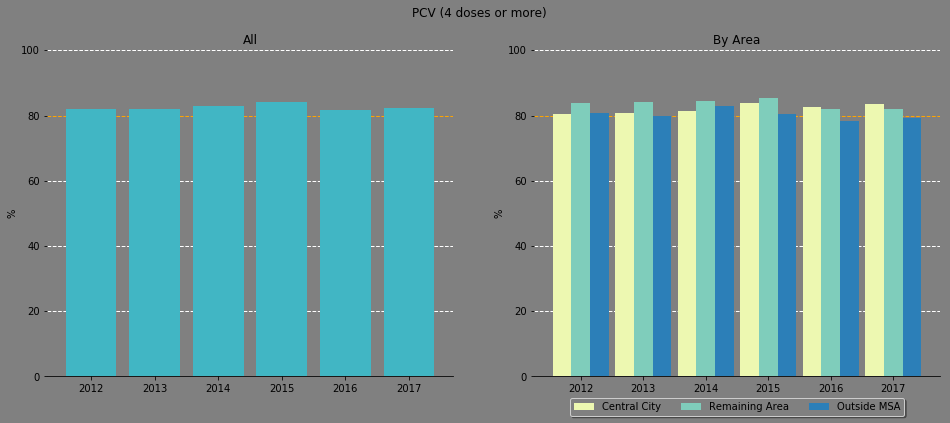

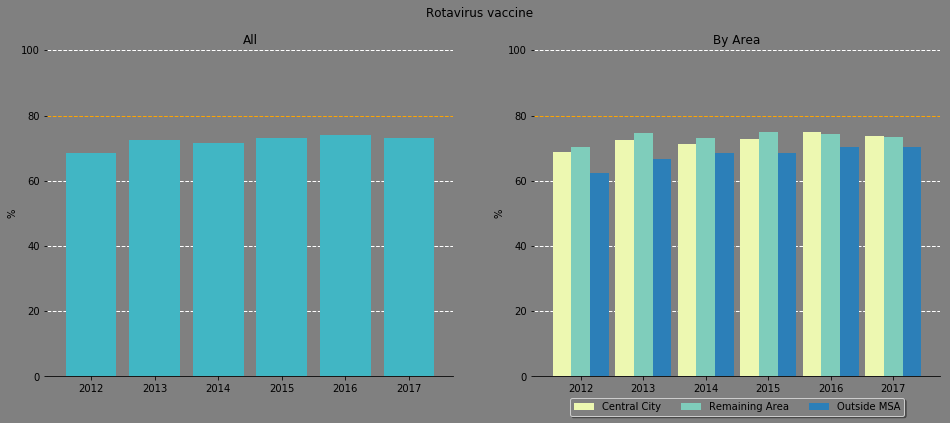

In [286]:
for index, i in enumerate(df['Vaccine'].unique()):
    df_vac = df[df['Vaccine']==i][['Year', 'All', 'Central city', 'Remaining Area', 'Outside MSA']]
    df_vac = df_vac[df_vac['Year']>2010]
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))
    fig.patch.set_facecolor('grey')
    ax1.set_facecolor('grey')
    ax2.set_facecolor('grey')
    
    fig.suptitle(i)
    ax1.bar(df_vac['Year'], df_vac['All'],color='#41b6c4')
    ax1.set_ylim([0,100])
    ax1.set_ylabel('%')
    ax1.set_title('\nAll')

    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    
    # grid
    ax1.grid(color='white', linestyle='dashed', linewidth=1, axis = 'y')
    ax1.set_axisbelow(True)
    
    gridlines = ax1.get_ygridlines()
    b = gridlines[4]
    b.set_color('orange')
    
    #fig, ax = plt.subplots(1,figsize=(16,10))
    ax2.bar(df_vac['Year']-0.15, df_vac['Central city'], width = -0.3, align='edge', color='#edf8b1')
    ax2.bar(df_vac['Year'], df_vac['Remaining Area'], width = 0.3, align='center', color='#7fcdbb')
    ax2.bar(df_vac['Year']+0.15, df_vac['Outside MSA'], width = 0.3, align='edge', color='#2c7fb8')
    #plt.plot(df_vac['Year'],df_vac[['Central city', 'Remaining Area', 'Outside MSA']])

    ax2.legend(['Central City', 'Remaining Area', 'Outside MSA'],loc='upper center', bbox_to_anchor=(0.5, -0.05), 
               fancybox=True, shadow=True, ncol=5, facecolor='grey')
    ax2.set_ylim([0,100])
    ax2.set_ylabel('%')
    ax2.set_title('\nBy Area')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    # grid
    ax2.grid(color='white', linestyle='dashed', linewidth=1, axis = 'y')
    ax2.set_axisbelow(True)
    
    gridlines = ax2.get_ygridlines()
    b = gridlines[4]
    b.set_color('orange')
    
    #plt.show()
    plt.savefig(str(index)+'.png', facecolor=fig.get_facecolor(), edgecolor='none')
    #"#edf8b1","#7fcdbb","#2c7fb8"

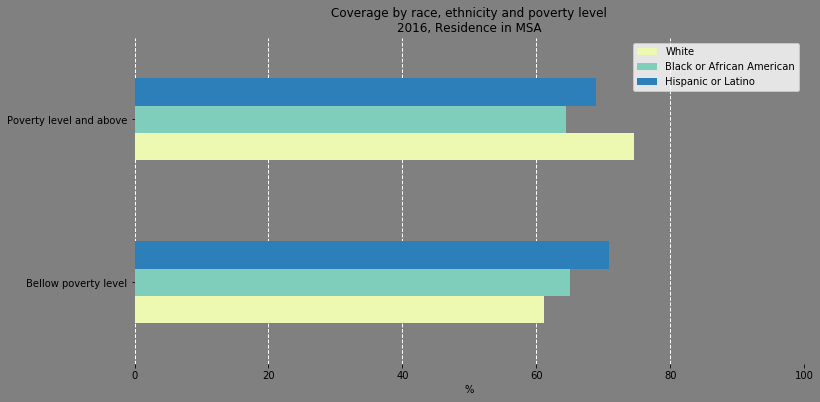

In [278]:
# data from 2016
df_r = pd.read_csv('children_vaccination_race.csv')


fig, ax = plt.subplots(1,figsize=(12,6))
fig.patch.set_facecolor('grey')
ax.set_facecolor('grey')    

df_r.plot(kind='barh', x='income', ax=ax, title='Coverage by race, ethnicity and poverty level\n2016, Residence in MSA',
         color=["#edf8b1","#7fcdbb","#2c7fb8"])
ax.set_yticklabels(['Bellow poverty level', 'Poverty level and above'])
ax.set_ylabel('')
ax.set_xlabel('%')
ax.set_xlim([0,100])

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.grid(color='white', linestyle='dashed', linewidth=1, axis = 'x')
ax.set_axisbelow(True)

plt.savefig('Race_Ethinicity_Poverty.png', facecolor=fig.get_facecolor(), edgecolor='none')
#"#edf8b1","#7fcdbb","#2c7fb8"

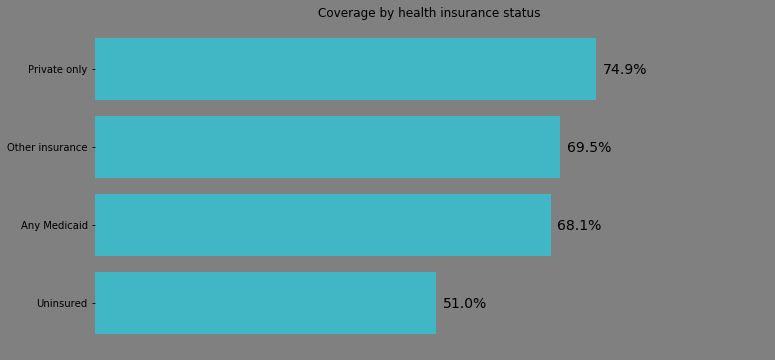

In [277]:
# data from 2017
df_i = pd.read_csv('children_vaccination_insurance.csv')
df_i.sort_values(by='Coverage', inplace=True)

fig, ax = plt.subplots(1, figsize=(12,6))
fig.patch.set_facecolor('grey')
ax.set_facecolor('grey')
barcollection = plt.barh(df_i['Health insurance status'],df_i['Coverage'],color='#41b6c4')

ax.set_xlim([0,100])
ax.set_title('Coverage by health insurance status')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticks([])

y = df_i['Coverage'].values
for idx, b in enumerate(barcollection):
    plt.text(y[idx] + 1, idx - 0.06, str(y[idx])+'%',fontsize=14)

plt.savefig('insurance.png', facecolor=fig.get_facecolor(), edgecolor='none')

In [205]:
#https://www.arcgis.com/home/item.html?id=f7f805eb65eb4ab787a0a3e1116ca7e5
import geopandas as gpd

usa = gpd.read_file('./us/states.shp')

In [207]:
usa.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,(POLYGON ((-160.0738033454681 22.0041773479577...
1,Washington,2,53,Pacific,WA,(POLYGON ((-122.4020153103835 48.2252163723779...
2,Montana,3,30,Mountain,MT,POLYGON ((-111.4754253002074 44.70216236909688...
3,Maine,4,23,New England,ME,(POLYGON ((-69.77727626137293 44.0741483685119...
4,North Dakota,5,38,West North Central,ND,POLYGON ((-98.73043728833767 45.93827137024809...


In [208]:
df_states = pd.read_csv('children_vaccination_states.csv')
df_states.head()

,Names,2017,TARGET
0,Alabama,71.2,80.0
1,Alaska,69.5,80.0
2,Arizona,66.5,80.0
3,Arkansas,69.4,80.0
4,California,68.6,80.0


In [209]:
state_map = usa.set_index('STATE_NAME').join(df_states.set_index('Names'))
state_map.head()

,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry,2017,TARGET
STATE_NAME,,,,,,,
Hawaii,1,15,Pacific,HI,(POLYGON ((-160.0738033454681 22.0041773479577...,69.8,80.0
Washington,2,53,Pacific,WA,(POLYGON ((-122.4020153103835 48.2252163723779...,69.9,80.0
Montana,3,30,Mountain,MT,POLYGON ((-111.4754253002074 44.70216236909688...,66.2,80.0
Maine,4,23,New England,ME,(POLYGON ((-69.77727626137293 44.0741483685119...,72.7,80.0
North Dakota,5,38,West North Central,ND,POLYGON ((-98.73043728833767 45.93827137024809...,78.8,80.0


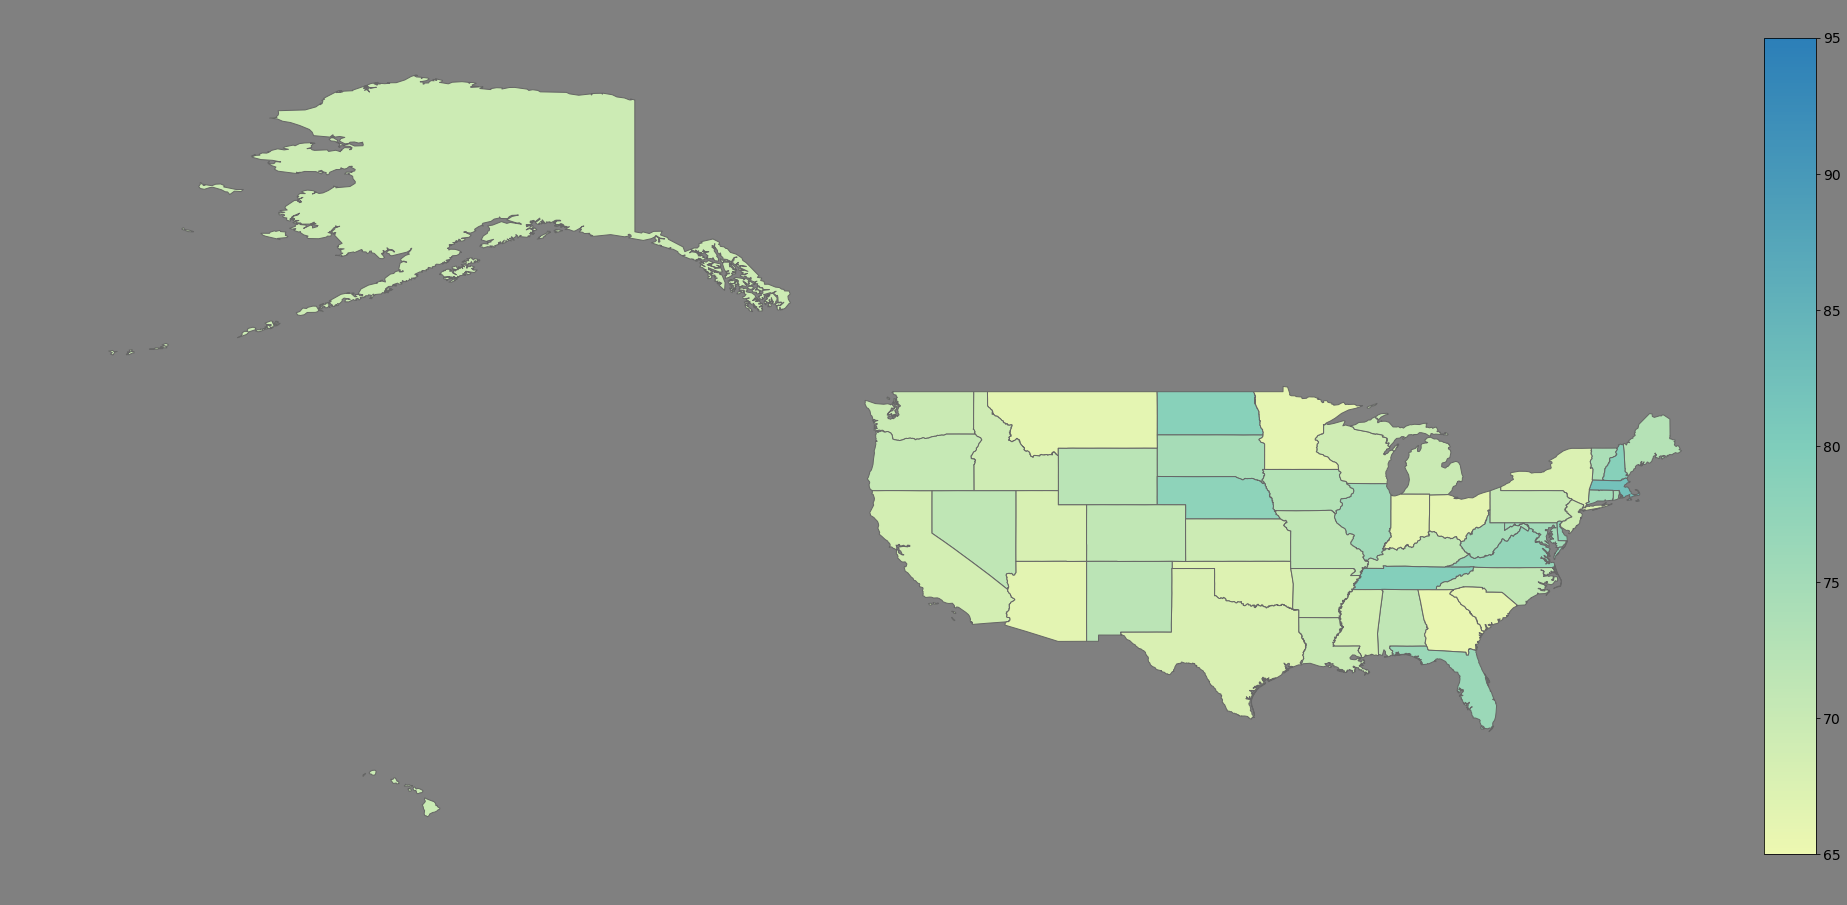

In [279]:
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable

vmin=65
vmax=95

fig, ax = plt.subplots(1, figsize=(32, 16))
fig.patch.set_facecolor('grey')
    
ax.axis('off')
ax = fig.add_subplot(111)
    
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#edf8b1","#7fcdbb","#2c7fb8"])
state_map.plot(cmap=cmap, column = '2017', ax=ax, linewidth=1, edgecolor='0.4',vmin=vmin, vmax=vmax)

# color bar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.05)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.tick_params(labelsize=14)

ax.axis('off')
plt.savefig('map.png', facecolor=fig.get_facecolor(), edgecolor='none')    

#ax.text(488800, 5448600, r'VANCOUVER, BC, CANADA', fontsize=20)